In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


If you use google colab for training, you can use kaggle datasets directly with the help of a token. [Reference](https://www.kaggle.com/general/74235)

In [2]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           8417        261  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            730         33  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           1955         66  1.0              
evangower/premier-league-match-

In [3]:
!kaggle datasets download -d iamsouravbanerjee/indian-food-images-dataset

!unzip /content/indian-food-images-dataset.zip

100% 353M/355M [00:14<00:00, 25.7MB/s]
100% 355M/355M [00:14<00:00, 25.8MB/s]
Archive:  /content/indian-food-images-dataset.zip
  inflating: Indian Food Images/Indian Food Images/adhirasam/02d09e872d.jpg  
  inflating: Indian Food Images/Indian Food Images/adhirasam/02f2e49039.jpg  
  inflating: Indian Food Images/Indian Food Images/adhirasam/06c639bab2.jpg  
  inflating: Indian Food Images/Indian Food Images/adhirasam/08b8f8efc1.jpg  
  inflating: Indian Food Images/Indian Food Images/adhirasam/09a37d7cc7.jpg  
  inflating: Indian Food Images/Indian Food Images/adhirasam/0cd70ffc10.jpg  
  inflating: Indian Food Images/Indian Food Images/adhirasam/0d09b0e580.jpg  
  inflating: Indian Food Images/Indian Food Images/adhirasam/0e84c2b7fd.jpg  
  inflating: Indian Food Images/Indian Food Images/adhirasam/10f608ecc4.jpg  
  inflating: Indian Food Images/Indian Food Images/adhirasam/12b1eb8026.jpg  
  inflating: Indian Food Images/Indian Food Images/adhirasam/13a2cfd13f.jpg  
  inflating: I

In [4]:
IMAGE_DIR = "/content/Indian Food Images/Indian Food Images"

import os

# Create a list of all the class names
class_names = sorted(os.listdir(IMAGE_DIR))
class_names
classes = len(class_names)

In [5]:
!pip install split-folders

import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
splitfolders.ratio(IMAGE_DIR, output="IMAGES", seed=42, ratio=(.7, .2, .1))

Copying files: 4000 files [00:01, 3328.43 files/s]


In [7]:
IMAGE_DIR = "/content/IMAGES/"

TRAIN_DIR = "/content/IMAGES/train/"
VAL_DIR = "/content/IMAGES/val/"
TEST_DIR = "/content/IMAGES/test/"

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

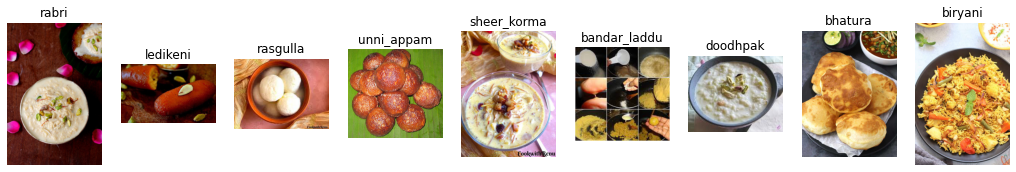

In [9]:
def view_random_images(dirpath, class_names=class_names):
  """
  A utility function to view random images and their labels from the specified directory
  """
  plt.figure(figsize=(20, 14))
  for i in range(1, 10):
    class_name = random.choice(class_names)

    img = mpimg.imread(dirpath+class_name+"/"+random.choice(os.listdir(dirpath+class_name)))
    plt.subplot(1, 10, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis(False)

view_random_images(TRAIN_DIR, class_names=class_names)
    

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

val_data = val_datagen.flow_from_directory(VAL_DIR,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode="categorical")

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 2800 images belonging to 80 classes.
Found 800 images belonging to 80 classes.
Found 400 images belonging to 80 classes.


In [12]:
import tensorflow as tf

In [13]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),                                   
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

In [24]:
history_3 = model_3.fit(train_data,
            epochs=50,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/50
88/88 [==============================] - 30s 340ms/step - loss: 0.0561 - accuracy: 0.9932 - val_loss: 5.5535 - val_accuracy: 0.2100
Epoch 2/50
88/88 [==============================] - 31s 357ms/step - loss: 0.0511 - accuracy: 0.9943 - val_loss: 5.4132 - val_accuracy: 0.2075
Epoch 3/50
88/88 [==============================] - 29s 330ms/step - loss: 0.0428 - accuracy: 0.9936 - val_loss: 5.5503 - val_accuracy: 0.2113
Epoch 4/50
88/88 [==============================] - 29s 331ms/step - loss: 0.0502 - accuracy: 0.9939 - val_loss: 5.2231 - val_accuracy: 0.2150
Epoch 5/50
88/88 [==============================] - 29s 325ms/step - loss: 0.0350 - accuracy: 0.9943 - val_loss: 5.6185 - val_accuracy: 0.2175
Epoch 6/50
88/88 [==============================] - 30s 346ms/step - loss: 0.0409 - accuracy: 0.9954 - val_loss: 5.5218 - val_accuracy: 0.2087
Epoch 7/50
88/88 [==============================] - 29s 330ms/step - loss: 0.0534 - accuracy: 0.9929 - val_loss: 5.0674 - val_accuracy: 0.2188

13/13 [==============================] - 3s 227ms/step - loss: 5.3563 - accuracy: 0.2400


[5.356253623962402, 0.23999999463558197]

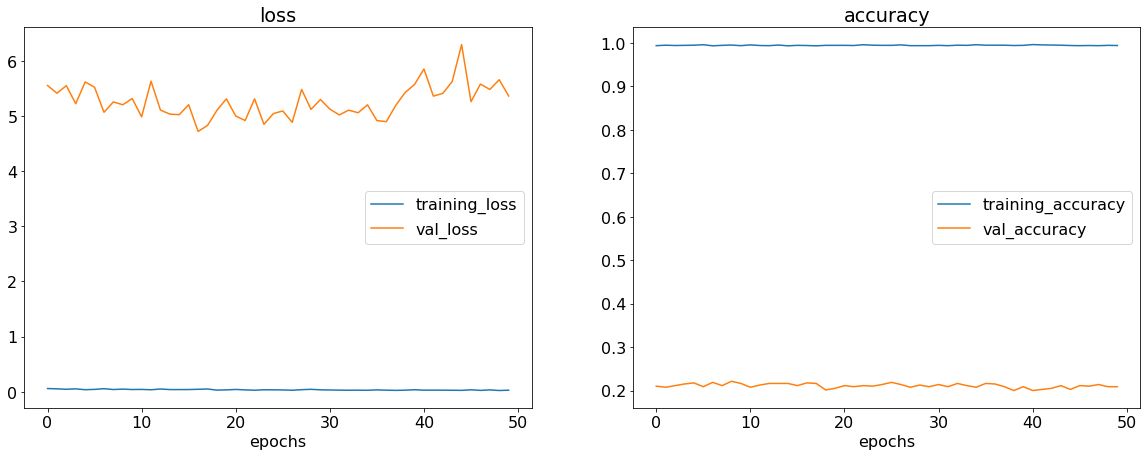

In [25]:
def plot_curves(history):
  """
  A utility function that inputs a keras History object and plot the loss and accuracy (both training and validation) of the model 
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(20, 7))
  plt.rcParams['font.size'] = '16'

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

plot_curves(history_3)
model_3.evaluate(test_data)


In [26]:
model_3.save("/content/model/model_3.h5")

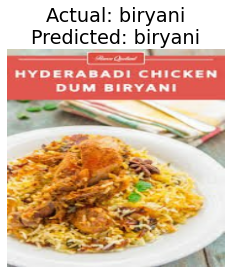

In [33]:
def pred_and_show(model, img_path, actual_class, class_names=class_names):
  """
  An utility function that uses the input model and makes prediction
  """
  # Read in the image
  img = tf.io.read_file(img_path)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [224, 224])
  # Rescale the image (get all values betwen 0 & 1)
  img = img/255.

  pred = model.predict(tf.expand_dims(img, 0))

  if len(class_names) > 2:
    class_name = class_names[int(tf.argmax(pred[0]))]
  else:
    class_name = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Actual: {actual_class}\nPredicted: {class_name}")
  plt.axis(False)


def pred_random_image(model, dir_path=TEST_DIR, class_names=class_names):
  """
  This function selects a random image from the specified directory and then predicts the possible class by calling the pred_and_show function
  """
  random_class = random.choice(class_names)

  img_path = dir_path + random_class + "/" + random.choice(os.listdir(dir_path + random_class))
  
  pred_and_show(model, img_path, random_class, class_names)


pred_random_image(model_3, TEST_DIR, class_names)